# Paso 9. Ecuación de Laplace para la presión

$$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = 0
$$

#### Discretización

$$
\frac{p(i+1, j)_n - 2p(i, j)_n + p(i-1, j)_n}{\Delta x^2} + \frac{p(i, j+1)_n - 2p(i, j)_n + p(i, j-1)_n}{\Delta x^2} = 0
$$


$$
\frac{p(i+1, j)_n - 2p(i, j)_n + p(i-1, j)_n}{\Delta x^2} + \frac{p(i, j+1)_n - 2p(i, j)_n + p(i, j-1)_n}{\Delta x^2} = 0
$$

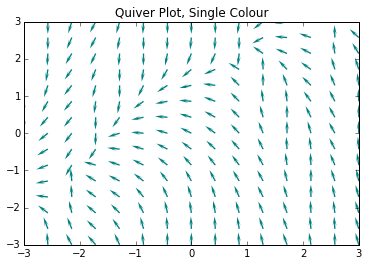

In [1]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Y, X = np.mgrid[-3:3:15j, -3:3:15j]
U = -1 - np.cos(X**2 + Y)
V = 1 + X - Y
speed = np.sqrt(U**2 + V**2)
UN = U/speed
VN = V/speed

plot2 = plt.figure()
plt.quiver(X, Y, UN, VN, 
           color='Teal', 
           headlength=7)

plt.title('Quiver Plot, Single Colour')
plt.show(plot2)